# **QUESTIONS**


#1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

| Feature | K-Means Clustering | Hierarchical Clustering |
| :--- | :--- | :--- |
| **Method** | Partitioning method (divides into K groups). | Connectivity-based (builds a tree/dendrogram). |
| **Parameters** | Requires number of clusters ($K$) beforehand. | No need to define clusters beforehand. |
| **Speed** | Faster, good for large datasets. | Slower, computationally expensive. |
| **Shape** | Assumes spherical clusters. | Can detect arbitrary shapes. |
| **Use Case** | Customer Segmentation (grouping by spend). | Biological Taxonomy (species family tree). |

#2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

The **Silhouette Score** is a metric used to evaluate the quality of clusters created by an algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- **Range:** The score ranges from **-1 to +1.**

  - +1: The sample is far away from the neighboring clusters and very close to its own cluster center (Best).
  
  - 0: The sample is on or very close to the decision boundary between two neighboring clusters.
  
  - -1: The sample may have been assigned to the wrong cluster (Worst).
  
- **Purpose:** It helps determine the optimal number of clusters ($K$) and validates consistency within clusters without needing ground truth labels (unsupervised validation).

#3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two core parameters:

1. eps **(Epsilon):**

- **Definition:** The maximum radius (distance) around a data point to define its "neighborhood."

- **Influence:** If eps is too small, most data will be considered noise (outliers) because they won't have enough neighbors. If eps is too large, distinct clusters may merge into one giant cluster.

2. min_samples:

- **Definition:** The minimum number of points required within the eps radius to classify a point as a "Core Point" (a dense region).

- **Influence:** Larger values make the algorithm more resistant to noise but might miss smaller, less dense clusters. Smaller values identify more clusters but might include noise as part of a cluster.

#4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Clustering algorithms like K-Means and DBSCAN rely heavily on distance calculations (e.g., Euclidean distance) to determine which points belong together.

- **The Problem:** If features have different scales (e.g., "Income" ranges from 20,000 to 100,000, while "Age" ranges from 18 to 65), the feature with the larger range (Income) will mathematically dominate the distance formula. The algorithm will cluster primarily based on Income and ignore Age.

- **The Solution:** Feature scaling (like Standardization or Normalization) transforms all features to the same scale (e.g., mean=0, std=1), ensuring that each feature contributes equally to the clustering process.

#5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

The **Elbow Method** is a heuristic technique used to select the optimal number of clusters ($K$) for K-Means.

- **Process:**

  1. Run K-Means for a range of $K$ values (e.g., 1 to 10).
  
  2. For each $K$, calculate the **WCSS** (Within-Cluster Sum of Squares), which represents the variance or "error" within clusters.
  
  3. Plot $K$ vs. WCSS.
  
- **Interpretation:** As $K$ increases, WCSS naturally decreases (more clusters = strictly tighter groups). However, we look for the **"Elbow Point"**—the point where the rate of decrease sharply slows down. This point represents the best trade-off between having compact clusters and not overfitting with too many clusters.

#6. **Dataset:** Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.
# Question: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

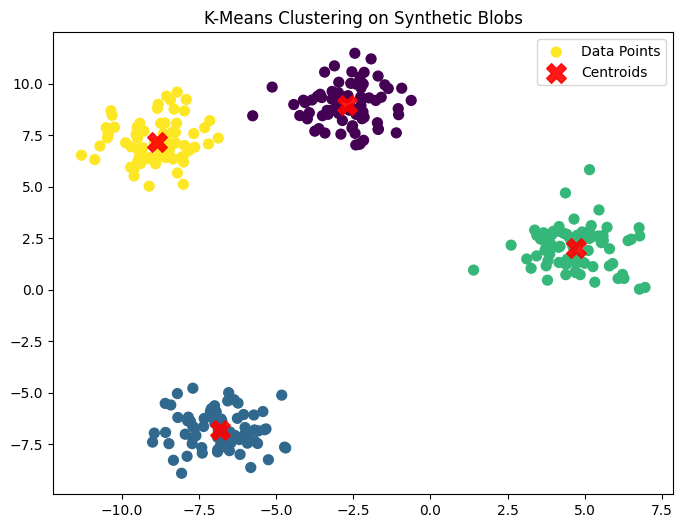

Cluster Centers:
 [[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate Data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 3. Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Blobs")
plt.legend()
plt.show()

print("Cluster Centers:\n", centers)

#7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Data
wine = load_wine()
X = wine.data

# 2. Scale Data (Crucial for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN
# Note: eps=2.0 is chosen here because 13-dimensional scaled space is sparse.
# Default eps=0.5 often results in all noise for high-dim data without tuning.
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Count Clusters (Label -1 is noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found: 5
Number of noise points: 85


#8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

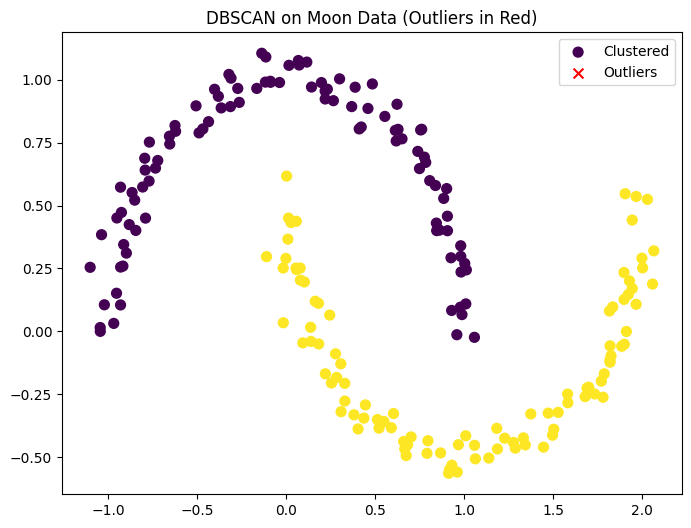

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Generate Data
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Visualize
plt.figure(figsize=(8, 6))

# Plot clusters
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1], s=50, cmap='viridis', label='Clustered')

# Plot outliers (noise) in red
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN on Moon Data (Outliers in Red)")
plt.legend()
plt.show()

#9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

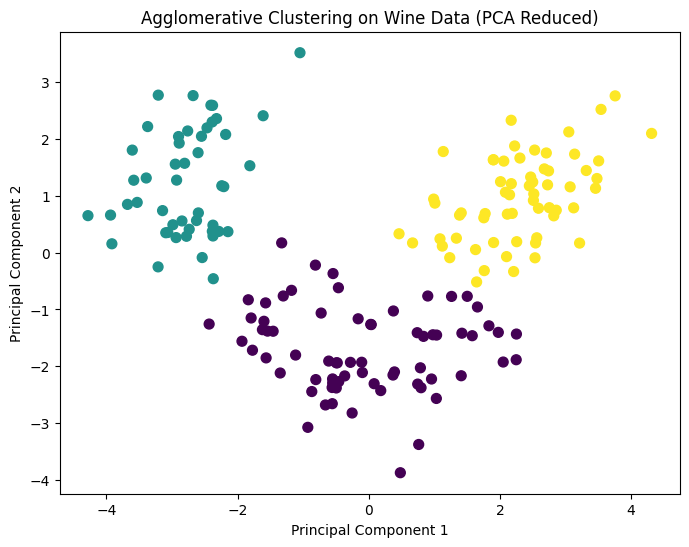

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Load and Scale
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3) # Wine has 3 classes
labels = agg.fit_predict(X_pca)

# 4. Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
#Describe your real-world data science workflow using clustering:
#● Which clustering algorithm(s) would you use and why?
#● How would you preprocess the data (missing values, scaling)?
#● How would you determine the number of clusters?
#● How would the marketing team benefit from your clustering analysis?

**ANSWERS**

**1. Algorithm Selection:** I would use **K-Means Clustering**.

- **Why?** K-Means is computationally efficient for large customer datasets. It produces distinct, non-overlapping segments which are easier for marketing teams to interpret (e.g., "High Spenders" vs. "Bargain Hunters") compared to fuzzy or hierarchical outputs.

**2. Data Preprocessing:**

- **Missing Values:** Impute numerical missings (like 'Average Session Duration') with the median to avoid outliers skewing the data. Categorical missings might be filled with a "Unknown" tag or the mode.
- **Scaling:** Crucial step. Since we are comparing monetary values (e.g., Total Spend: $5000) with frequencies (e.g., Purchase Count: 5), I would apply **StandardScaler** (Z-score normalization) so that high-magnitude features don't dominate the distance calculations.

**3. Determining Number of Clusters:** I would use the **Elbow Method** combined with the **Silhouette Score.**

- I'll plot the Elbow curve to find the mathematical inflection point.

- Then, I will validate that $K$ using the Silhouette score to ensure the clusters are well-separated.

- Practical Check: I will verify if the clusters make business sense (e.g., if $K=10$ gives clusters that are too similar, I might reduce it to $K=5$ for actionable marketing buckets).

**4. Benefit to Marketing Team:**

- **Targeted Promotions:** Instead of sending a generic "10% Off" email to everyone, they can send "VIP Exclusive Access" to the High-Spender Cluster and "BOGO Deals" to the Price-Sensitive Cluster.

- **Churn Prevention:** Identify a cluster of "Inactive High Value" customers and target them with re-engagement campaigns.

- **Product Recommendations:** Recommend products popular within a specific cluster to other members of that same cluster.